<a href="https://colab.research.google.com/github/Geon0904/Geon0904/blob/main/Salary%20of%20Data%20Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2023 미국 데이터 사이언스 연봉

## 데이터 불러오기

In [ ]:
# 필요한 라이브러리 임폴트
import pandas as pd

# 파일 경로 설정
file_path = '/content/drive/MyDrive/데이터분석/ds_salaries.csv'

# DataFrame 생성
df = pd.read_csv(file_path)

# 결과 확인하기
print(df)


"""
Work Year: 일 시작 년도
experience level: EN: Entry Level / MI: Mid Level / SE: Senior Level / EX: Executive Level
employment type: FT: Full Time / CT: Contract (계약직)
job title:
remote_ratio: 원격 비율
company size: 해당 회사에서 한 해 동안 근무한 사람의 중위수이며, S(소) / M(중) / L(대)
"""

      work_year experience_level employment_type                 job_title  \
0          2023               SE              FT  Principal Data Scientist   
1          2023               MI              CT               ML Engineer   
2          2023               MI              CT               ML Engineer   
3          2023               SE              FT            Data Scientist   
4          2023               SE              FT            Data Scientist   
...         ...              ...             ...                       ...   
3750       2020               SE              FT            Data Scientist   
3751       2021               MI              FT  Principal Data Scientist   
3752       2020               EN              FT            Data Scientist   
3753       2020               EN              CT     Business Data Analyst   
3754       2021               SE              FT      Data Science Manager   

       salary salary_currency  salary_in_usd employee_residence

'\nWork Year: 일 시작 년도\nexperience level: EN: Entry Level / MI: Mid Level / SE: Senior Level / EX: Executive Level\nemployment type: FT: Full Time / CT: Contract (계약직)\njob title:\nremote_ratio: 원격 비율\ncompany size: 해당 회사에서 한 해 동안 근무한 사람의 중위수이며, S(소) / M(중) / L(대) \n'

## 데이터 전처리

### 불필요한 컬럼 제거

In [ ]:
import pandas as pd

### 불필요한 컬럼 삭제
df.drop(columns=['salary', 'salary_currency'], inplace=True)

# 미국 데이터만 추출하고 다른 나라는 제거
df = df[df['employee_residence'] == 'US']

### 미국만 남았으니 company_location도 필요 X
df.drop(columns=['company_location', 'employee_residence'], inplace=True)

# 추출된 데이터 확인 및 저장
print(df)

      work_year experience_level employment_type                 job_title  \
1          2023               MI              CT               ML Engineer   
2          2023               MI              CT               ML Engineer   
5          2023               SE              FT         Applied Scientist   
6          2023               SE              FT         Applied Scientist   
9          2023               SE              FT            Data Scientist   
...         ...              ...             ...                       ...   
3749       2021               SE              FT           Data Specialist   
3750       2020               SE              FT            Data Scientist   
3751       2021               MI              FT  Principal Data Scientist   
3752       2020               EN              FT            Data Scientist   
3753       2020               EN              CT     Business Data Analyst   

      salary_in_usd  remote_ratio company_size  
1             

<ipython-input-23-8afef2a2f6f9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['company_location', 'employee_residence'], inplace=True)


### 누락 데이터 처리

In [ ]:
### 각 컬럼별 누락 데이터의 수 확인
num_nulls = df.isnull().sum()
print(f'각 컬럼별 누락 데이터의 수: \n{num_nulls}')

각 컬럼별 누락 데이터의 수: 
work_year           0
experience_level    0
employment_type     0
job_title           0
salary_in_usd       0
remote_ratio        0
company_size        0
dtype: int64


### 이상치 처리

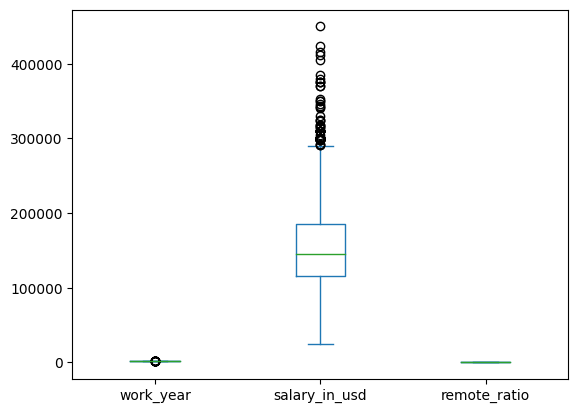

In [ ]:
### boxplot을 이용한 이상치 존재 유무 시각화

# 필요한 라이브러리 임폴트
import matplotlib.pyplot as plt

# 시각화
df.plot(kind='box')
plt.show()

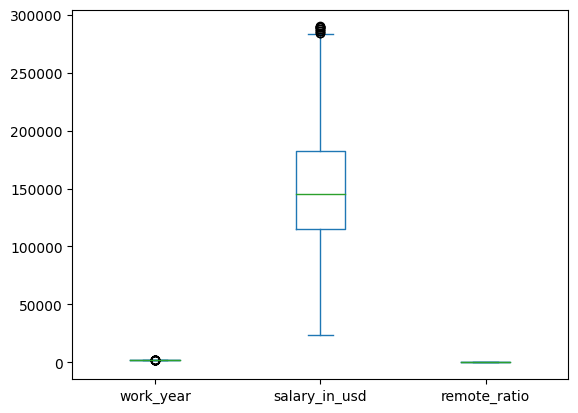

In [ ]:
# 이상치 처리 (IQR 기반)
Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['salary_in_usd'] >= lower_bound) & (df['salary_in_usd'] <= upper_bound)]

# 시각화
df.plot(kind='box')
plt.show()

## EDA(탐색적 데이터 분석)

In [ ]:
### 필요한 라이브러리 임폴트
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

"""
상관관계가 없다면 굳이 시각화 하지 않겠습니다
"""

'\n상관관계가 없다면 굳이 시각화 하지 않겠습니다\n'

In [ ]:
"""
상관계수 해석 가이드라인
0.7 이상: 매우 강한 상관관계
0.5 ~ 0.7: 강한 상관관계
0.3 ~ 0.5: 중간 정도의 상관관계
0.1 ~ 0.3: 약한 상관관계
0.1 미만: 거의 상관관계가 없음
"""

### 연봉과 work year 컬럼의 관계 분석

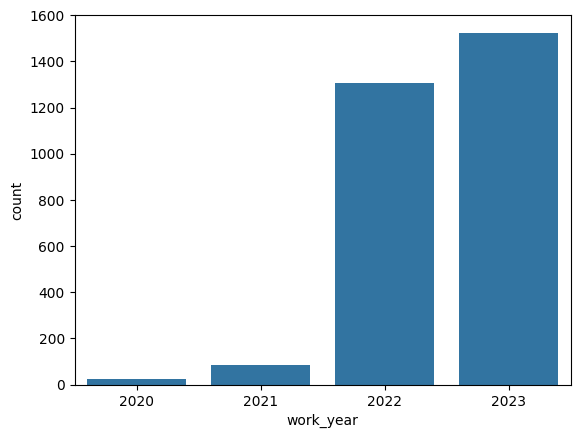

In [ ]:
# work_year 컬럼 시각화
sns.countplot(data=df, x='work_year')
plt.show()

In [ ]:
### 상관 관계 분석
df_corr = df.loc[:,['salary_in_usd', 'work_year']].corr()
print(f'연봉과 근무 년도의 상관 계수 : \n{df_corr}')

연봉과 근무 년도의 상관 계수 : 
               salary_in_usd  work_year
salary_in_usd       1.000000   0.087374
work_year           0.087374   1.000000


### 연봉과 experience level 컬럼의 관계 분석

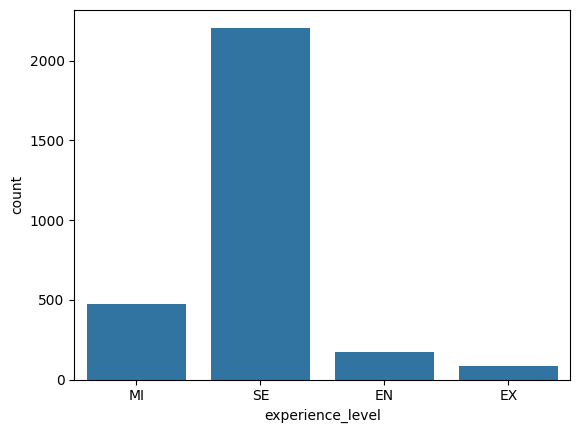

In [ ]:
# experience_level 시각화

sns.countplot(data=df, x='experience_level')
plt.show()

연봉과 경력의 상관 계수 : 
                          salary_in_usd  experience_level_encoded
salary_in_usd                  1.000000                  0.224279
experience_level_encoded       0.224279                  1.000000
--------------------------------------------------------------------------------


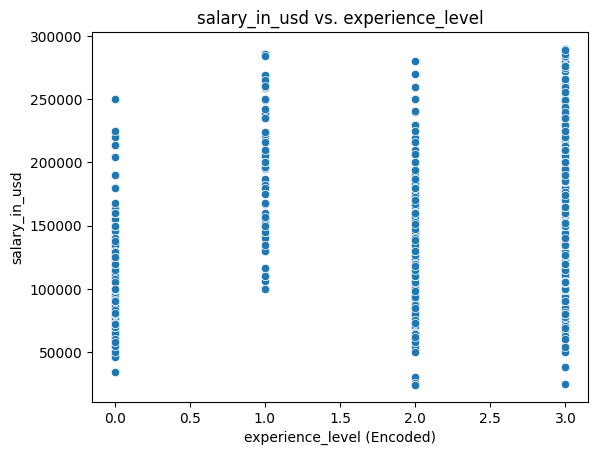

In [ ]:
"""
experience_level 컬럼에서 데이터들이 숫자가 아니고 object 타입이기 때문에 상관관계 분석이 어려움.
따라서, Label encoding을 사용
"""

# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['experience_level_encoded'] = le.fit_transform(df['experience_level'])

"""
MI: 0 / SE: 1 / EN: 2 / EX: 3
"""

# 상관계수
df_corr = df[['salary_in_usd', 'experience_level_encoded']].corr()
print(f'연봉과 경력의 상관 계수 : \n{df_corr}')

print('-'*80)

# 시각화
sns.scatterplot(x='experience_level_encoded', y='salary_in_usd', data=df)
plt.xlabel('experience_level (Encoded)')
plt.ylabel('salary_in_usd')
plt.title('salary_in_usd vs. experience_level')
plt.show()


### 연봉과 employment type 컬럼의 관계 분석

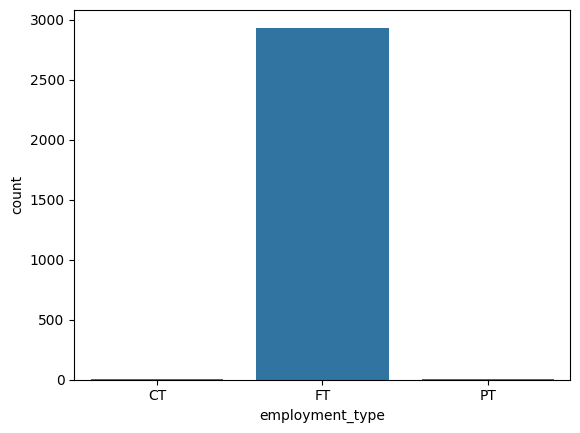

'\nCT와 PT는 거의 없고 다 FT이기 때문에 굳이 관계 분석을 하지 않아도 될 것 같네요\n'

In [ ]:
# employment_type 컬럼 시각화
sns.countplot(data=df, x='employment_type')
plt.show()

"""
CT와 PT는 거의 없고 다 FT이기 때문에 굳이 관계 분석을 하지 않아도 될 것 같네요
"""

연봉과 고용 유형의 상관 계수 : 
                         salary_in_usd  employment_type_encoded
salary_in_usd                 1.000000                 0.022509
employment_type_encoded       0.022509                 1.000000
--------------------------------------------------------------------------------


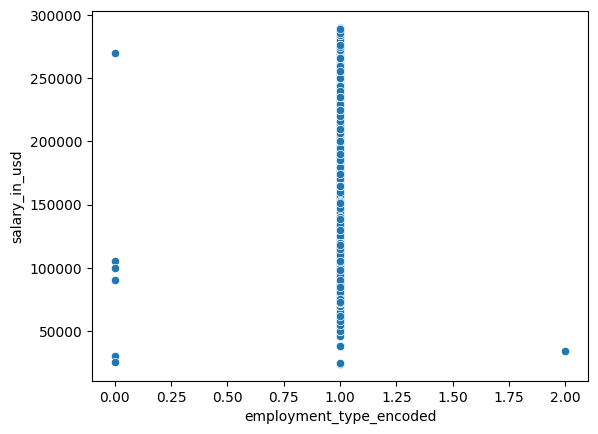

In [ ]:
"""
그래도 굳~이 해보자면!
"""

# Label Encoding
le = LabelEncoder()
df['employment_type_encoded'] = le.fit_transform(df['employment_type'])

"""
CT: 0 / FT: 1 / PT: 2
"""

# 상관 계수
df_corr = df[['salary_in_usd', 'employment_type_encoded']].corr()
print(f'연봉과 고용 유형의 상관 계수 : \n{df_corr}')

print('-'*80)

### 연봉과 고용 유형의 관계 시각화
sns.scatterplot(data=df, x='employment_type_encoded', y='salary_in_usd')
plt.show()

### 연봉과 job title 컬럼의 관계 분석

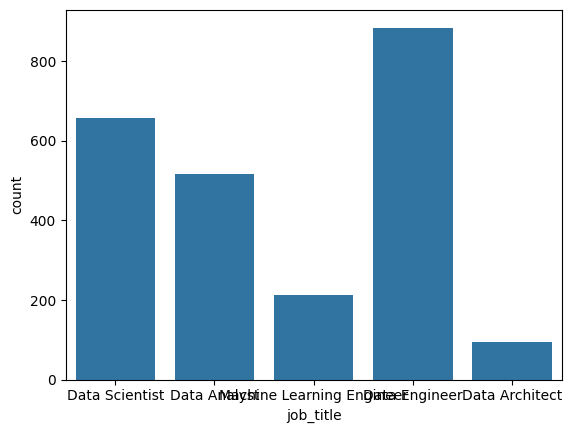

'\n가장 많은 직업 순서:\n0 -> Data Scientists (2등)\n1 -> Data Analyst (3등)\n2 -> Machine Learning Engineer (4등)\n3 -> Data Engineer (1등)\n4 -> Data Architect (5등)\n'

In [ ]:
# 직업이 너무 많으니 Top 5 직업만 먼저 추출
top_5_job_titles = df['job_title'].value_counts().nlargest(5).index.tolist()

# 상위 5개 직업만 포함하는 새로운 데이터 프레임을 생성
df1 = df[df['job_title'].isin(top_5_job_titles)]

sns.countplot(data=df1, x='job_title')
plt.show()


"""
가장 많은 직업 순서:
0 -> Data Scientists (2등)
1 -> Data Analyst (3등)
2 -> Machine Learning Engineer (4등)
3 -> Data Engineer (1등)
4 -> Data Architect (5등)
"""

<ipython-input-32-0ab7538b82cd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['job_title_encoded'] = le.fit_transform(df1['job_title'])


연봉과 직업의 상관 계수 : 
0.3243486598389422
--------------------------------------------------------------------------------


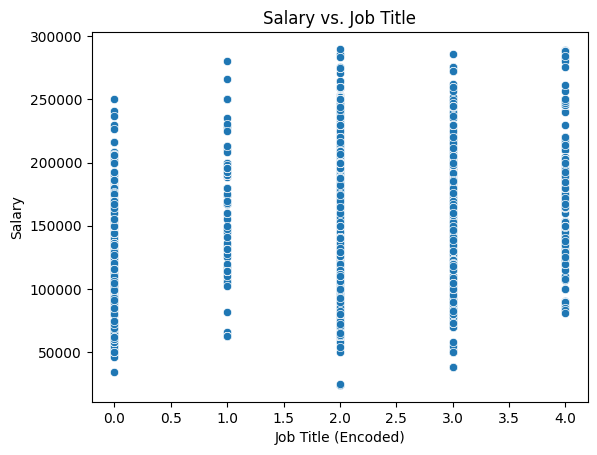

In [ ]:
# Label encoding
le = LabelEncoder()
df1['job_title_encoded'] = le.fit_transform(df1['job_title'])

# 상관 계수
df_corr = df['salary_in_usd'].corr(df1['job_title_encoded'])
print(f'연봉과 직업의 상관 계수 : \n{df_corr}')

print('-'*80)

### 연봉과 직업 간의 관계 시각화
merged_df = pd.merge(df, df1)

sns.scatterplot(x='job_title_encoded', y='salary_in_usd', data=merged_df)
plt.xlabel('Job Title (Encoded)')
plt.ylabel('Salary')
plt.title('Salary vs. Job Title')
plt.show()

### 연봉과 remote ratio 컬럼의 관계 분석

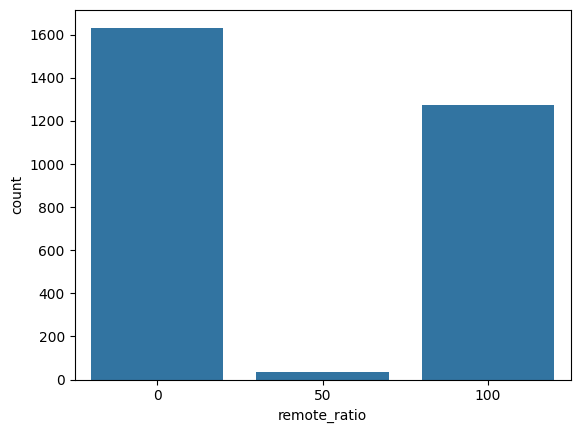

'\nremote_ratio는 재택근무 / 원격 근무 비율을 말합니다.\n0이면 무조건 출근, 50이면 100명 중 50명이 원격 / 100이면 모두 재택\n'

In [ ]:
# remote_ratio 컬럼 시각화
sns.countplot(data=df, x='remote_ratio')
plt.show()

"""
remote_ratio는 재택근무 / 원격 근무 비율을 말합니다.
0이면 무조건 출근, 50이면 100명 중 50명이 원격 / 100이면 모두 재택
"""

In [ ]:
### 상관 관계 분석
df_corr = df.loc[:, ['remote_ratio', 'salary_in_usd']].corr()
print(f'연봉과 원격 근무 비율의 상관 계수 : \n{df_corr}')

"""
음... 상관이 없네요. 굳이 출근 안해도 원격으로 같은 연봉을 받을 수 있다 이 말입니다.
"""

연봉과 원격 근무 비율의 상관 계수 : 
               remote_ratio  salary_in_usd
remote_ratio       1.000000      -0.011523
salary_in_usd     -0.011523       1.000000


'\n음... 상관이 없네요. 굳이 출근 안해도 원격으로 같은 연봉을 받을 수 있다 이 말입니다.\n'

### 연봉과 company size 컬럼의 관계 분석

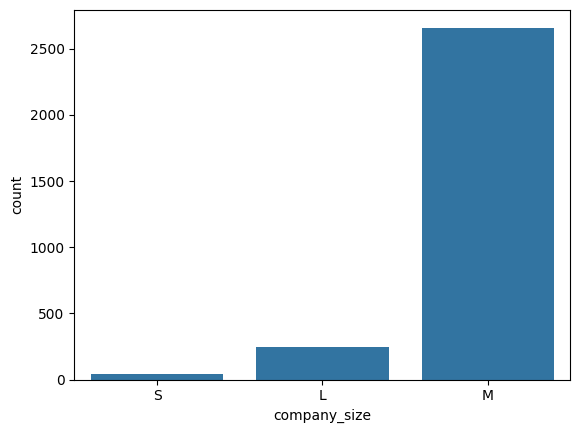

In [ ]:
# company_size 컬럼 시각화
sns.countplot(data=df, x='company_size')
plt.show()

연봉과 회사 규모의 상관 계수 : 
               salary_in_usd  company_size
salary_in_usd       1.000000     -0.044197
company_size       -0.044197      1.000000
--------------------------------------------------------------------------------


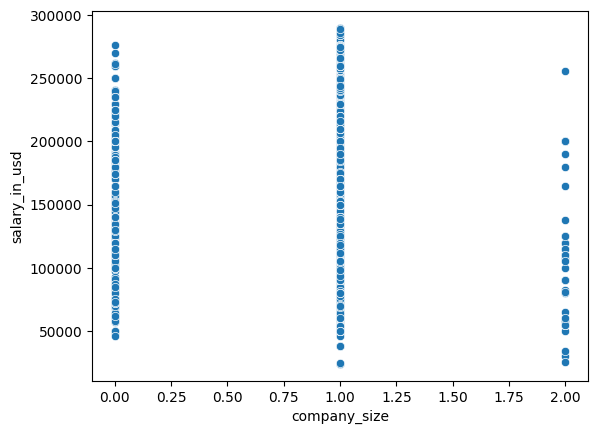

'\nS -> 0 / L -> 1 / M -> 2\n\n예상외로 회사 규모(직원이 많고 적고)에 따라 큰 연봉 차이는 없네요. 물론 L일수록 살짝 고연봉인듯 해보임.\n'

In [ ]:
# Label Encoding
le = LabelEncoder()
df['company_size'] = le.fit_transform(df['company_size'])

# 상관 계수 분석
df_corr = df[['salary_in_usd', 'company_size']].corr()
print(f'연봉과 회사 규모의 상관 계수 : \n{df_corr}')

print('-'*80)

# 시각화
sns.scatterplot(data=df, x='company_size', y='salary_in_usd')
plt.show()

"""
S -> 0 / L -> 1 / M -> 2

예상외로 회사 규모(직원이 많고 적고)에 따라 큰 연봉 차이는 없네요. 물론 L일수록 살짝 고연봉인듯 해보임.
"""

# 결론

In [ ]:
# Find the top 10 highest salaries
top_10_salaries = df['salary_in_usd'].nlargest(10)

# Filter rows where salary is in the top 5
filtered_df = df[df['salary_in_usd'].isin(top_10_salaries)]

# Print the result
print(filtered_df)

      work_year experience_level employment_type                  job_title  \
117        2023               SE              FT         Analytics Engineer   
123        2023               SE              FT         Analytics Engineer   
377        2023               SE              FT  Machine Learning Engineer   
472        2023               EX              FT              Data Engineer   
1093       2023               SE              FT              Data Engineer   
1185       2023               SE              FT  Machine Learning Engineer   
1187       2023               SE              FT  Machine Learning Engineer   
1271       2023               SE              FT  Machine Learning Engineer   
1460       2023               SE              FT             Data Scientist   
1724       2023               SE              FT                ML Engineer   

      salary_in_usd  remote_ratio  company_size  experience_level_encoded  \
117          289800             0             1      